In [41]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import acquire_zillow as acq
import acquire_mall as acq_mall
import prepare_mall as prep_mall

In [2]:
df_total_2016 = acq.get_2016_property_data()

In [3]:
df_total_2016.head()

,transactiondate,logerror,parcelid,airconditioningdesc,architecturalstyledesc,basementsqft,bathroomcnt,bedroomcnt,buildingclassdesc,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,2016-01-01,0.03,11016594,Central,None,nan,2.00,3.00,None,4.00,...,nan,nan,"122,754.00","360,170.00","2,015.00","237,416.00","6,735.88",None,nan,"60,371,066,461,001.00"
1,2016-01-01,-0.17,14366692,None,None,nan,3.50,4.00,None,nan,...,nan,nan,"346,458.00","585,529.00","2,015.00","239,071.00","10,153.02",None,nan,nan
2,2016-01-01,-0.00,12098116,Central,None,nan,3.00,2.00,None,4.00,...,nan,nan,"61,994.00","119,906.00","2,015.00","57,912.00","11,484.48",None,nan,"60,374,638,003,004.00"
3,2016-01-02,0.02,12643413,Central,None,nan,2.00,2.00,None,4.00,...,nan,nan,"171,518.00","244,880.00","2,015.00","73,362.00","3,048.74",None,nan,"60,372,963,002,002.00"
4,2016-01-02,-0.01,14432541,None,None,nan,2.50,4.00,None,nan,...,2.00,nan,"169,574.00","434,551.00","2,015.00","264,977.00","5,488.96",None,nan,"60,590,423,381,006.00"


In [4]:
df_total_2017 = acq.get_2017_property_data()

In [5]:
df_total_2017.head()

,transactiondate,logerror,parcelid,airconditioningdesc,architecturalstyledesc,basementsqft,bathroomcnt,bedroomcnt,buildingclassdesc,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,2017-01-01,0.03,14297519,None,None,nan,3.50,4.00,None,nan,...,nan,nan,"485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72",None,nan,"60,590,630,072,012.00"
1,2017-01-01,0.06,17052889,None,None,nan,1.00,2.00,None,nan,...,1.00,nan,"88,000.00","464,000.00","2,016.00","376,000.00","5,672.48",None,nan,"61,110,010,023,006.00"
2,2017-01-01,0.01,14186244,None,None,nan,2.00,3.00,None,nan,...,1.00,nan,"85,289.00","564,778.00","2,016.00","479,489.00","6,488.30",None,nan,"60,590,218,022,012.00"
3,2017-01-01,-0.10,12177905,None,None,nan,3.00,4.00,None,8.00,...,nan,nan,"108,918.00","145,143.00","2,016.00","36,225.00","1,777.51",None,nan,"60,373,001,001,006.00"
4,2017-01-01,0.01,10887214,Central,None,nan,3.00,3.00,None,8.00,...,nan,nan,"73,681.00","119,407.00","2,016.00","45,726.00","1,533.89",None,nan,"60,371,236,012,000.00"


In [6]:
df_total_2016.shape

(90275, 60)

In [7]:
df_total_2017.shape

(77613, 60)

In [8]:
df_total_2016.describe(include='all')

,transactiondate,logerror,parcelid,airconditioningdesc,architecturalstyledesc,basementsqft,bathroomcnt,bedroomcnt,buildingclassdesc,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
count,90275,"90,275.00","90,275.00",28781,261,43.00,"90,275.00","90,275.00",16,"57,364.00",...,"20,570.00",222.00,"89,895.00","90,274.00","90,275.00","90,274.00","90,269.00",1783,"1,783.00","89,670.00"
unique,352,nan,nan,6,6,nan,nan,nan,1,nan,...,nan,nan,nan,nan,nan,nan,nan,1,nan,nan
top,2016-07-29,nan,nan,Central,Contemporary,nan,nan,nan,Buildings having wood or wood and steel frames,nan,...,nan,nan,nan,nan,nan,nan,nan,Y,nan,nan
freq,910,nan,nan,26668,221,nan,nan,nan,16,nan,...,nan,nan,nan,nan,nan,nan,nan,1783,nan,nan
mean,NaN,0.01,"12,984,656.11",NaN,NaN,713.58,2.28,3.03,NaN,5.57,...,1.44,1.00,"180,093.39","457,672.63","2,015.00","278,335.33","5,983.98",NaN,13.40,"60,491,508,546,031.58"
std,NaN,0.16,"2,504,510.49",NaN,NaN,437.43,1.00,1.16,NaN,1.90,...,0.54,0.00,"209,129.89","554,884.40",0.00,"400,495.46","6,838.88",NaN,2.72,"204,660,503,527.14"
min,NaN,-4.61,"10,711,738.00",NaN,NaN,100.00,0.00,0.00,NaN,1.00,...,1.00,1.00,100.00,22.00,"2,015.00",22.00,49.08,NaN,6.00,"60,371,011,101,001.00"
25%,NaN,-0.03,"11,559,500.00",NaN,NaN,407.50,2.00,2.00,NaN,4.00,...,1.00,1.00,"81,245.00","199,023.25","2,015.00","82,228.00","2,872.83",NaN,13.00,"60,373,203,001,019.75"
50%,NaN,0.01,"12,547,337.00",NaN,NaN,616.00,2.00,3.00,NaN,7.00,...,1.00,1.00,"132,000.00","342,872.00","2,015.00","192,970.00","4,542.75",NaN,14.00,"60,376,149,506,506.00"
75%,NaN,0.04,"14,227,552.00",NaN,NaN,872.00,3.00,4.00,NaN,7.00,...,2.00,1.00,"210,534.50","540,589.00","2,015.00","345,419.50","6,901.09",NaN,15.00,"60,590,423,321,006.00"


In [9]:
df_total_2017.describe(include='all')

,transactiondate,logerror,parcelid,airconditioningdesc,architecturalstyledesc,basementsqft,bathroomcnt,bedroomcnt,buildingclassdesc,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
count,77613,"77,613.00","77,613.00",25007,207,50.00,"77,579.00","77,579.00",15,"49,809.00",...,"17,599.00",172.00,"77,464.00","77,578.00","77,579.00","77,577.00","77,574.00",2900,"2,900.00","77,332.00"
unique,264,nan,nan,5,5,nan,nan,nan,2,nan,...,nan,nan,nan,nan,nan,nan,nan,1,nan,nan
top,2017-06-30,nan,nan,Central,Contemporary,nan,nan,nan,Buildings having wood or wood and steel frames,nan,...,nan,nan,nan,nan,nan,nan,nan,Y,nan,nan
freq,1195,nan,nan,23186,173,nan,nan,nan,14,nan,...,nan,nan,nan,nan,nan,nan,nan,2900,nan,nan
mean,NaN,0.02,"13,007,807.00",NaN,NaN,679.72,2.30,3.05,NaN,6.53,...,1.43,1.00,"189,281.08","490,150.59","2,016.00","301,151.53","5,995.96",NaN,14.09,"60,496,673,885,751.22"
std,NaN,0.17,"3,518,717.01",NaN,NaN,689.70,1.00,1.14,NaN,1.72,...,0.54,0.00,"230,410.68","653,797.86",0.00,"492,724.92","7,628.86",NaN,2.18,"1,533,339,296,950.52"
min,NaN,-4.66,"10,711,855.00",NaN,NaN,38.00,0.00,0.00,NaN,1.00,...,1.00,1.00,44.00,"1,000.00","2,016.00",161.00,19.92,NaN,3.00,"60,371,011,101,000.00"
25%,NaN,-0.02,"11,538,209.00",NaN,NaN,273.00,2.00,2.00,NaN,6.00,...,1.00,1.00,"84,179.25","206,898.50","2,016.00","85,293.00","2,712.63",NaN,14.00,"60,373,109,004,005.00"
50%,NaN,0.01,"12,530,044.00",NaN,NaN,515.00,2.00,3.00,NaN,6.00,...,1.00,1.00,"136,404.50","358,878.50","2,016.00","203,188.00","4,448.26",NaN,15.00,"60,376,032,001,510.50"
75%,NaN,0.04,"14,211,010.00",NaN,NaN,796.50,3.00,4.00,NaN,8.00,...,2.00,1.00,"218,734.00","569,000.00","2,016.00","366,753.00","6,926.92",NaN,15.00,"60,590,423,251,007.00"


This is how to write to csv, by calling the command from the acquire.py:

In [10]:
# acq.write_2016_csv(acq.get_2016_property_data())

In [11]:
# acq.write_2017_csv(acq.get_2017_property_data())

Look at all the 2016 data

In [12]:
look_16 = acq.peekatdata(df_total_2016)
look_16

HEAD:
  transactiondate             logerror  parcelid airconditioningdesc  \
0      2016-01-01                 0.03  11016594             Central   
1      2016-01-01                -0.17  14366692                None   
2      2016-01-01                -0.00  12098116             Central   
3      2016-01-02                 0.02  12643413             Central   
4      2016-01-02                -0.01  14432541                None   

  architecturalstyledesc         basementsqft          bathroomcnt  \
0                   None                  nan                 2.00   
1                   None                  nan                 3.50   
2                   None                  nan                 3.00   
3                   None                  nan                 2.00   
4                   None                  nan                 2.50   

            bedroomcnt buildingclassdesc  buildingqualitytypeid  \
0                 3.00              None                   4.00   
1     

transactiondate                     0
logerror                            0
parcelid                            0
airconditioningdesc             61494
architecturalstyledesc          90014
basementsqft                    90232
bathroomcnt                         0
bedroomcnt                          0
buildingclassdesc               90259
buildingqualitytypeid           32911
calculatedbathnbr                1182
decktypeid                      89617
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
finishedsquarefeet12             4679
finishedsquarefeet13            90242
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedsquarefeet6             89854
fips                                0
fireplacecnt                    80668
fullbathcnt                      1182
garagecarcnt                    60338
garagetotalsqft                 60338
hashottuborspa                  87910
heatingorsystemdesc             34195
latitude    

Look at all the 2017 data

In [13]:
look_17 = acq.peekatdata(df_total_2017)
look_17

HEAD:
  transactiondate             logerror  parcelid airconditioningdesc  \
0      2017-01-01                 0.03  14297519                None   
1      2017-01-01                 0.06  17052889                None   
2      2017-01-01                 0.01  14186244                None   
3      2017-01-01                -0.10  12177905                None   
4      2017-01-01                 0.01  10887214             Central   

  architecturalstyledesc         basementsqft          bathroomcnt  \
0                   None                  nan                 3.50   
1                   None                  nan                 1.00   
2                   None                  nan                 2.00   
3                   None                  nan                 3.00   
4                   None                  nan                 3.00   

            bedroomcnt buildingclassdesc  buildingqualitytypeid  \
0                 4.00              None                    nan   
1     

transactiondate                     0
logerror                            0
parcelid                            0
airconditioningdesc             52606
architecturalstyledesc          77406
basementsqft                    77563
bathroomcnt                        34
bedroomcnt                         34
buildingclassdesc               77598
buildingqualitytypeid           27804
calculatedbathnbr                 650
decktypeid                      76999
finishedfloor1squarefeet        71576
calculatedfinishedsquarefeet      235
finishedsquarefeet12             3690
finishedsquarefeet13            77571
finishedsquarefeet15            74586
finishedsquarefeet50            71576
finishedsquarefeet6             77227
fips                               34
fireplacecnt                    69324
fullbathcnt                       650
garagecarcnt                    52093
garagetotalsqft                 52093
hashottuborspa                  76074
heatingorsystemdesc             28042
latitude    

In [43]:
df_mall_total = acq_mall.get_mall_data()

In [44]:
df_mall_total.shape

(200, 5)

In [45]:
df_mall_total.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
df_mall_total.set_index('customer_id', inplace=True)

In [47]:
df_mall_total.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [48]:
df_mall_total.columns

Index(['gender', 'age', 'annual_income', 'spending_score'], dtype='object')

In [49]:
df_mall_total.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

In [50]:
df_mall_total.age.value_counts(bins=3)

(17.947, 35.333]    98
(35.333, 52.667]    66
(52.667, 70.0]      36
Name: age, dtype: int64

In [51]:
df_mall_total.age.value_counts(bins=[18, 26, 32, 40, 50, 80])

(32.0, 40.0]      41
(26.0, 32.0]      41
(50.0, 80.0]      40
(17.999, 26.0]    40
(40.0, 50.0]      38
Name: age, dtype: int64

In [52]:
for col in df_mall_total.select_dtypes('number'):
    print(col)
    print(df_mall_total[col].value_counts(bins=4))

age
(17.947, 31.0]    70
(31.0, 44.0]      61
(44.0, 57.0]      43
(57.0, 70.0]      26
Name: age, dtype: int64
annual_income
(45.5, 76.0]      86
(14.877, 45.5]    58
(76.0, 106.5]     48
(106.5, 137.0]     8
Name: annual_income, dtype: int64
spending_score
(25.5, 50.0]     64
(50.0, 74.5]     54
(74.5, 99.0]     43
(0.901, 25.5]    39
Name: spending_score, dtype: int64


In [53]:
df_mall_total.isna().sum()

gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [54]:
df_mall_total.describe(include='all')

,gender,age,annual_income,spending_score
count,200,200.00,200.00,200.00
unique,2,nan,nan,nan
top,Female,nan,nan,nan
freq,112,nan,nan,nan
mean,NaN,38.85,60.56,50.20
std,NaN,13.97,26.26,25.82
min,NaN,18.00,15.00,1.00
25%,NaN,28.75,41.50,34.75
50%,NaN,36.00,61.50,50.00
75%,NaN,49.00,78.00,73.00


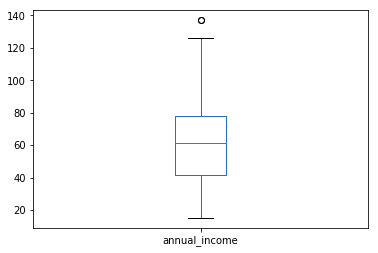

In [55]:
df_mall_total.annual_income.plot.box()

In [56]:
df_mall_total.annual_income.quantile()

61.5

In [28]:
# q1 = df_mall_total.annual_income.quantile(.25)
# q3 = df_mall_total.annual_income.quantile(.75)
# iqr = q3 - q1
# # df_mall_total.annual_income > (q3 + 1.5 * iqr)
# # df_mall_total[df_mall_total.annual_income > (q3 + 1.5 * iqr)]
# df_mall_total['is_annual_income_outlier'] = df_mall_total.annual_income > (q3 + 1.5 * iqr)
# df_mall_total.head()

In [57]:
import prepare_mall as prep_mall

In [30]:
# prep_mall.add_upper_outlier_columns(df_mall_total, k=1.5)

# df_mall_total.head()

In [31]:
# outlier_cols = [col for col in df_mall_total if col.endswith('_outliers')]
# for col in outlier_cols:
#     print('~~~\n' + col)
#     data = df_mall_total[col][df_mall_total[col] > 0]
#     print(data.describe())

In [32]:
# dummies = pd.get_dummies(df_mall_total)
# dummies

All the items above work here in the notebook, but do not work in the prepare.py

Why?

Code below does not want to call the main function

In [58]:
# prep_mall.prep_mall_data(acq_mall.get_mall_data())
#prep_mall.add_upper_outlier_columns(acq_mall.get_mall_data(), k=1.5)
k=1.5
monkey = prep_mall.prep_mall_data(acq_mall.get_mall_data())
monkey
# monkey = prep.prep_telco(acq.get_telco_data())


TypeError: get_upper_outliers() missing 1 required positional argument: 'k'

In [60]:
look_mall = acq_mall.peekatdata(df_mall_total)

AttributeError: module 'acquire_mall' has no attribute 'peekatdata'

In [ ]:
dummies = pd.get_dummies(field to pass in)

this encodes a field
theis breaks distinct values out of a column and gives each their own field and labels each, so you cna run models on each column